## Using Data set

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("HR_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,18-05-2022,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,15-05-2022,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,10-07-2022,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,06-07-2022,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [5]:
data['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

In [7]:
data['Size'].describe()

count    4746.000000
mean      967.490729
std       634.202328
min        10.000000
25%       550.000000
50%       850.000000
75%      1200.000000
max      8000.000000
Name: Size, dtype: float64

<AxesSubplot:>

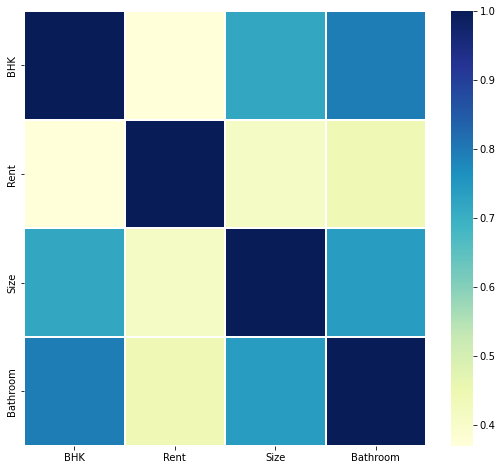

In [27]:
import seaborn as sns
matrix = data.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

               BHK      Rent      Size  Bathroom
BHK       1.000000  0.369718  0.716145  0.794885
Rent      0.369718  1.000000  0.413551  0.441215
Size      0.716145  0.413551  1.000000  0.740703
Bathroom  0.794885  0.441215  0.740703  1.000000
Columns with high correlation: [('BHK', 'Size'), ('BHK', 'Bathroom'), ('Size', 'BHK'), ('Size', 'Bathroom'), ('Bathroom', 'BHK'), ('Bathroom', 'Size')]


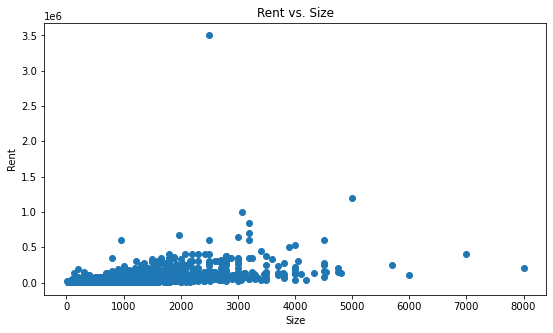

In [12]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Identify columns with high correlation
high_correlation_columns = []
for col in correlation_matrix.columns:
    for other_col in correlation_matrix.columns:
        if col != other_col and abs(correlation_matrix.loc[col, other_col]) >= 0.7:
            high_correlation_columns.append((col, other_col))

# Print the columns with high correlation
print(f"Columns with high correlation: {high_correlation_columns}")

# Keep only the columns that are not highly correlated
filtered_data = data.drop(columns=[col for col, other_col in high_correlation_columns])

# Continue your analysis with the filtered data
# Add the 'Size' column back to the filtered dataset
filtered_data['Size'] = data['Size']

# Continue your analysis with the filtered data
plt.figure(figsize = (9, 5))
plt.scatter(filtered_data['Size'], filtered_data['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Rent vs. Size')
plt.show()


In [14]:
import pandas as pd

# Load the dataset
data = pd.read_csv('HR_Dataset.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Identify columns with high correlation
high_correlation_columns = []
for col in correlation_matrix.columns:
    for other_col in correlation_matrix.columns:
        if col != other_col and abs(correlation_matrix.loc[col, other_col]) >= 0.7:
            high_correlation_columns.append((col, other_col))

# Print the columns with high correlation
print(f"Columns with high correlation: {high_correlation_columns}")

               BHK      Rent      Size  Bathroom
BHK       1.000000  0.369718  0.716145  0.794885
Rent      0.369718  1.000000  0.413551  0.441215
Size      0.716145  0.413551  1.000000  0.740703
Bathroom  0.794885  0.441215  0.740703  1.000000
Columns with high correlation: [('BHK', 'Size'), ('BHK', 'Bathroom'), ('Size', 'BHK'), ('Size', 'Bathroom'), ('Bathroom', 'BHK'), ('Bathroom', 'Size')]


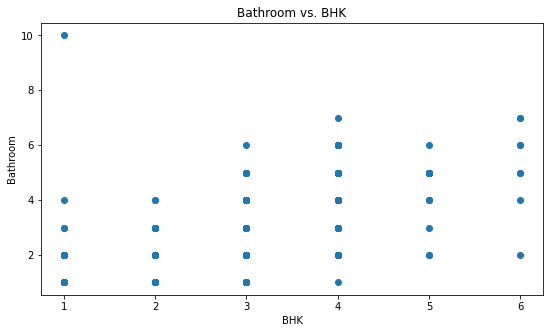

In [22]:
filtered_data['Bathroom'] = data['Bathroom']
filtered_data['BHK'] = data['BHK']

plt.figure(figsize=(9, 5))
plt.scatter(filtered_data['BHK'], filtered_data['Bathroom'])
plt.xlabel('BHK')
plt.ylabel('Bathroom')
plt.title('Bathroom vs. BHK')
plt.show()

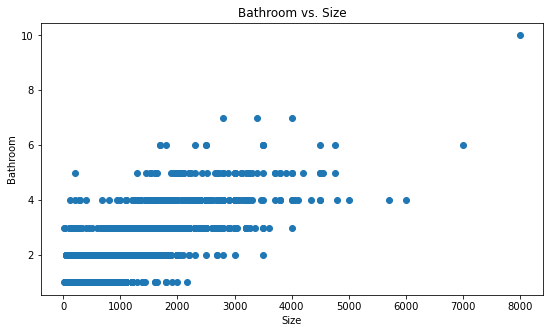

In [23]:
filtered_data['Bathroom'] = data['Bathroom']

filtered_data['Size'] = data['Size']

plt.figure(figsize=(9, 5))
plt.scatter(filtered_data['Size'], filtered_data['Bathroom'])
plt.xlabel('Size')
plt.ylabel('Bathroom')
plt.title('Bathroom vs. Size')
plt.show()

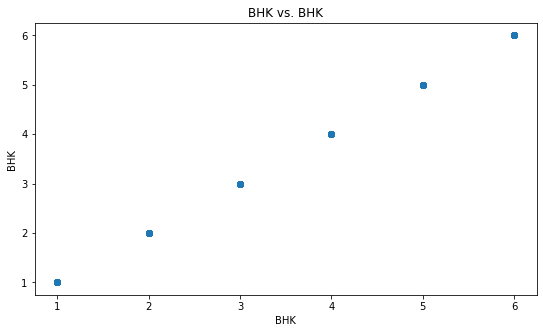

In [24]:
filtered_data['BHK'] = data['BHK']

plt.figure(figsize=(9, 5))
plt.scatter(filtered_data['BHK'], filtered_data['BHK'])
plt.xlabel('BHK')
plt.ylabel('BHK')
plt.title('BHK vs. BHK')
plt.show()

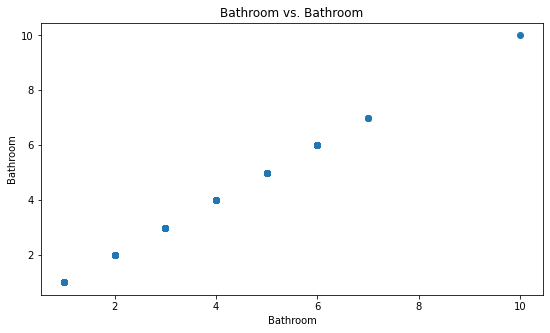

In [25]:
filtered_data['Bathroom'] = data['Bathroom']

plt.figure(figsize=(9, 5))
plt.scatter(filtered_data['Bathroom'], filtered_data['Bathroom'])
plt.xlabel('Bathroom')
plt.ylabel('Bathroom')
plt.title('Bathroom vs. Bathroom')
plt.show()